# Store music metadata using apple shortcuts
In this small project I was trying to store the metadata about the music that gets shazamed on my macOS
I started by trying to find Shazam database file on my system but that proved to be quit tricky
Note that I tried this on MacOs, it might be different in iOS device
TODO: test on mobile device

## Create a Shotcut
the the shortcut app, click on the plus sign, a new shortcut will be creted
<img src="imgs/shazam_create.png" alt="create a new shortcut" width="70%" style="margin:5px;"/>

Now the important part, I don't think I will be successful in explaining this without a video, I recorded one and put it on you tube, https://youtu.be/EvFkGQIeeOk

below is an attempt to make it work in this notebook, I am not sure if that will work reliably

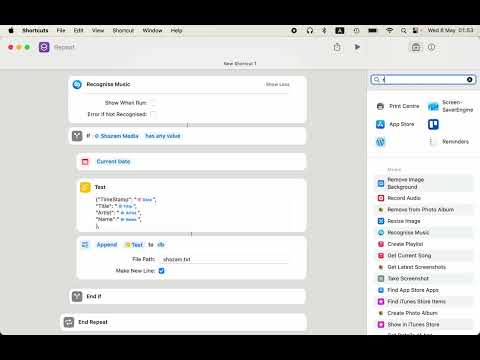

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EvFkGQIeeOk',autoplay=1, height=600, width=600)

By the end of the above video a text file was generated  and stored at "db/shazam.txt", given that you had some music playing on your system. 

<img src="imgs/shazam.png" alt="shows the text file created by the shotcut app" width="80%" style="margin:5px;"/>



Notice that a song was logged twice, this is because we set the wait element to 120 sec but the song is longer than that just go and change it in the shortcut or wait until you load the data to modify it as you wish.

This works even when you have your headphones on, given that you have the [Greatdy Computer Audio](http://www.greatdy.com/mac-os-x/screen-record-studio) which is the equivalent of the windows stereo mix. 


PLEASE NOTE: I am in no way encouraging to download Greatdy, I use it myself but I can't guarantee its fully OK to use


also note that in the video I stored only title, Artist and Name to keep the video short, here is the actual one I am using on my machine

<img src="imgs/shortcut.png" alt="shows the text file created by the shotcut app" width="80%" style="margin:5px;"/>



## read the data

In [2]:
import re
import pandas as pd

In [3]:
fn = 'shazam.txt'
def get_data(fn):
    with open(fn, "r") as f:
        data = f.read()
    rows = re.findall(r"\{.*?\}", data, re.MULTILINE | re.DOTALL)
    lst= []
    for r in rows:
        keys = re.findall(r"\n\"([A-Za-z ]+?)\"\:", r, re.DOTALL | re.MULTILINE)
        dct = {}
        for k in keys:
            dct[k] = re.findall(rf'"{k}"\: \"(.*?)\",?', r, re.MULTILINE | re.DOTALL)[0]
        lst.append(dct)
    return pd.DataFrame(lst)
df =  get_data(fn)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TimeStamp             92 non-null     object
 1   Title                 92 non-null     object
 2   Artist                92 non-null     object
 3   Lyrics Snippets       92 non-null     object
 4   Lyric Snippet Synced  92 non-null     object
 5   Artwork               92 non-null     object
 6   Video URL             92 non-null     object
 7   Shazem URL            92 non-null     object
 8   Apple Music URL       92 non-null     object
 9   Name                  92 non-null     object
dtypes: object(10)
memory usage: 7.3+ KB


In [4]:
df.head()

,TimeStamp,Title,Artist,Lyrics Snippets,Lyric Snippet Synced,Artwork,Video URL,Shazem URL,Apple Music URL,Name
0,8 May 2024 at 01:11,Live and Learn,The Cardigans,I came home in the morning\nAnd everything was...,"Well, you get what you give\nAnd hell, yes, I ...",Image,https://music.apple.com/gb/music-video/live-an...,https://www.shazam.com/track/11241484/live-and...,https://music.apple.com/gb/album/live-and-lear...,The Cardigans - Live and Learn
1,8 May 2024 at 01:13,Sunshine (Wookie Main Mix),Gabrielle,Made a wish I can dream\nI can be what I want ...,I can be what I want to be\nNot afraid to live...,Image,,https://www.shazam.com/track/221976/sunshine-w...,https://music.apple.com/gb/album/sunshine-wook...,Gabrielle - Sunshine (Wookie Main Mix)
2,8 May 2024 at 01:15,You Have to Hurt,Carly Simon,"(Frank Musker, Dominic King)\n'I'm in love wit...","(Frank Musker, Dominic King)\n'I'm in love wit...",Image,,https://www.shazam.com/track/389433/you-have-t...,https://music.apple.com/gb/album/you-have-to-h...,Carly Simon - You Have to Hurt
3,8 May 2024 at 01:17,That Ole Devil Called Love,Alison Moyet,It's that ole devil called love again\nGets be...,It's that ole devil called love again\nGets be...,Image,,https://www.shazam.com/track/5175007/that-ole-...,https://music.apple.com/gb/album/that-ole-devi...,Alison Moyet - That Ole Devil Called Love
4,8 May 2024 at 01:19,That Ole Devil Called Love,Alison Moyet,It's that ole devil called love again\nGets be...,With that ole devil called love\nHe'd follow m...,Image,,https://www.shazam.com/track/5175007/that-ole-...,https://music.apple.com/gb/album/that-ole-devi...,Alison Moyet - That Ole Devil Called Love


<ol>
  <li>
    <p><strong>Read File and Extract Data</strong>:</p>
    <pre>
with open(fn, "r") as f:
    data = f.read()
    </pre>
    <ul>
      <li>
        This code opens the file specified by <code>fn</code> in read mode
        (<code>"r"</code>) and reads its contents into the variable
        <code>data</code>.
      </li>
    </ul>
  </li>
  <li>
    <p><strong>Extract Rows</strong>:</p>
    <pre>
rows = re.findall(r"\{.*?\}", data, re.MULTILINE | re.DOTALL)
    </pre>
    <ul>
      <li>
        Using regular expressions (<code>re</code>), this line searches for all
        substrings within <code>data</code> that start with <code>{</code> and
        end with <code>}</code>, capturing everything in between. These
        substrings represent individual rows of data.
      </li>
    </ul>
  </li>
  <li>
    <p><strong>Extract Keys and Values</strong>:</p>
    <pre>
lst= []
for r in rows:
    keys = re.findall(r"\n\"([A-Za-z ]+?)\"\:", r, re.DOTALL | re.MULTILINE)
    dct = {}
    for k in keys:
        dct[k] = re.findall(rf'"{k}"\: \"(.*?)\",?', r, re.MULTILINE | re.DOTALL)[0]
    lst.append(dct)
    </pre>
    <ul>
      <li>
        For each row (<code>r</code>) extracted in the previous step, this code
        extracts keys and values from the row. It uses regular expressions to
        find all key-value pairs within each row.
      </li>
      <li>
        The outer loop iterates over each row, while the inner loop iterates
        over each key found in the row. For each key, it extracts its
        corresponding value using another regular expression.
      </li>
      <li>
        It then constructs a dictionary <code>dct</code> where the keys are the
        extracted keys and the values are the corresponding values.
      </li>
      <li>Finally, it appends this dictionary to a list <code>lst</code>.</li>
    </ul>
  </li>
  <li>
    <p><strong>Create DataFrame</strong>:</p>
    <pre>
return pd.DataFrame(lst)
    </pre>
    <ul>
      <li>
        This line converts the list of dictionaries (<code>lst</code>) into a
        pandas DataFrame using <code>pd.DataFrame()</code>. Each dictionary in
        the list represents a row of data, and pandas constructs a DataFrame
        where each key becomes a column.
      </li>
    </ul>
  </li>
  <li>
    <p>
      <strong>Call <code>get_data</code> Function and Display DataFrame</strong>
    </p>
    <pre>
df = get_data(fn)
df.head()
    </pre>
    <ul>
      <li>
        This code calls the <code>get_data</code> function with the filename
        <code>fn</code> and assigns the returned DataFrame to the variable
        <code>df</code>.
      </li>
      <li>
        It then uses <code>df.head()</code> to display the first few rows of the
        DataFrame.
      </li>
    </ul>
  </li>
</ol>
<p>
  In summary, this code reads data from a file, extracts rows of data using
  regular expressions, parses each row to extract keys and values, and then
  constructs a pandas DataFrame from the extracted data.
</p>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TimeStamp             92 non-null     object
 1   Title                 92 non-null     object
 2   Artist                92 non-null     object
 3   Lyrics Snippets       92 non-null     object
 4   Lyric Snippet Synced  92 non-null     object
 5   Artwork               92 non-null     object
 6   Video URL             92 non-null     object
 7   Shazem URL            92 non-null     object
 8   Apple Music URL       92 non-null     object
 9   Name                  92 non-null     object
dtypes: object(10)
memory usage: 7.3+ KB


In [6]:
#remove duplicates
subset = ['Artist', 'Title', 'Name']
print(subset)
df.drop_duplicates(subset=subset,inplace=True)
df.info()

['Artist', 'Title', 'Name']
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 89
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TimeStamp             52 non-null     object
 1   Title                 52 non-null     object
 2   Artist                52 non-null     object
 3   Lyrics Snippets       52 non-null     object
 4   Lyric Snippet Synced  52 non-null     object
 5   Artwork               52 non-null     object
 6   Video URL             52 non-null     object
 7   Shazem URL            52 non-null     object
 8   Apple Music URL       52 non-null     object
 9   Name                  52 non-null     object
dtypes: object(10)
memory usage: 4.5+ KB


looks like 2 minutes is too low

In [7]:
first_row = df.iloc[0]
first_row

TimeStamp                                             8 May 2024 at 01:11
Title                                                      Live and Learn
Artist                                                      The Cardigans
Lyrics Snippets         I came home in the morning\nAnd everything was...
Lyric Snippet Synced    Well, you get what you give\nAnd hell, yes, I ...
Artwork                                                             Image
Video URL               https://music.apple.com/gb/music-video/live-an...
Shazem URL              https://www.shazam.com/track/11241484/live-and...
Apple Music URL         https://music.apple.com/gb/album/live-and-lear...
Name                                       The Cardigans - Live and Learn
Name: 0, dtype: object

In [8]:
# !pip install lyricgenius
import lyricsgenius
# Initialize Genius API client
genius = lyricsgenius.Genius("YOUR_ACCESS_TOKEN")

# Search for a song
song = genius.search_song(first_row['Title'], first_row["Artist"])

# Print the lyrics
print(song.lyrics)

Searching for "Live and Learn" by The Cardigans...
Done.
8 ContributorsLive and Learn Lyrics[Verse 1]
I came home in the morning and everything was gone
Oh, what have I done?
I dropped dead in the hallway
Cursing the dawn
Oh come on, sun, why must I burn?
I'm just trying to learn

[Verse 2]
I stared into the light to kill some of my pain
It was all in vain, 'cause no senses remained
But an ache in my body
And regret on my mind
But I'll be fine

[Chorus 1]
'Cause I live and I learn
Yes, I live and I learn
If you live, you will learn
And I live and I learn

[Verse 3]
Got kicked in the head
So I started a fight
'Cause I knew I was right
But I learned I was wrong
I remember a slaughter
I remember I fought for the money I'd brought
See The Cardigans LiveGet tickets as low as $160You might also like[Chorus 2]
I got blistered and burned
And lost what I'd earned
But I lived and I learned
Yes, I lived and I learned

[Bridge]
I got, I got it now
I got, I got it now
(She’s got, she’s got it now)


In [9]:
import requests
import re
import pandas as pd
fn = 'https://raw.githubusercontent.com/sophie-greene/shazam/main/shazam.txt'
def get_data(fn):
    data = requests.get(fn).text
    rows = re.findall(r"\{.*?\}", data, re.MULTILINE | re.DOTALL)
    lst= []
    for r in rows:
        keys = re.findall(r"\n\"([A-Za-z ]+?)\"\:", r, re.DOTALL | re.MULTILINE)
        dct = {}
        for k in keys:
            dct[k] = re.findall(rf'"{k}"\: \"(.*?)\",?', r, re.MULTILINE | re.DOTALL)[0]
        lst.append(dct)
    return pd.DataFrame(lst)
df =  get_data(fn)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TimeStamp             94 non-null     object
 1   Title                 94 non-null     object
 2   Artist                94 non-null     object
 3   Lyrics Snippets       94 non-null     object
 4   Lyric Snippet Synced  94 non-null     object
 5   Artwork               94 non-null     object
 6   Video URL             94 non-null     object
 7   Shazem URL            94 non-null     object
 8   Apple Music URL       94 non-null     object
 9   Name                  94 non-null     object
dtypes: object(10)
memory usage: 7.5+ KB


In [6]:
df.text

'{\n"TimeStamp": "8 May 2024 at 01:11",\n"Title": "Live and Learn",\n"Artist": "The Cardigans",\n"is_Explicit": "No",\n"Lyrics Snippets": "I came home in the morning\nAnd everything was gone\nOh, what have I done?\nI dropped dead in the hallway\nCursing the dawn\nOh come on, sun",\n"Lyric Snippet Synced": "Well, you get what you give\nAnd hell, yes, I lived\nBut if you live as you learn\nI don\'t think I can learn\nOh with the sun in my eyes",\n"Artwork": "Image",\n"Video URL": "https://music.apple.com/gb/music-video/live-and-learn/1445697840",\n"Shazem URL": "https://www.shazam.com/track/11241484/live-and-learn?co=GB&referrer=shortcuts&offsetInMilliseconds=203940&timeSkew=0.0013536215&trackLength=253133&startDate=2024-05-08T00:11:06.902Z",\n"Apple Music URL": "https://music.apple.com/gb/album/live-and-learn/1444077673?i=1444078698&itscg=30201&itsct=Shazam_shortcuts",\n"Name": "The Cardigans - Live and Learn",\n},\n{\n"TimeStamp": "8 May 2024 at 01:13",\n"Title": "Sunshine (Wookie Main